<a href="https://colab.research.google.com/github/ashraful005/DS_ML_Bootcamp/blob/master/mobilenet_visualkeras_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
%%capture
!pip install torchmetrics
!pip install torchinfo

In [123]:
# Data handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Preprocessing
import cv2
from sklearn.model_selection import train_test_split as tts

# Torch
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from torchmetrics.classification import MulticlassAccuracy

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# os
import os

# Path
from pathlib import Path

# tqdm
from tqdm.auto import tqdm

# typing
from typing import Dict, List

# Counter
from collections import Counter

# random
import random

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [124]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"ashraful005","key":"4f746c27dab22414e17a0f5a0fe3baca"}'}

In [125]:
!pip install kaggle

In [126]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [127]:
!cp kaggle.json ~/.kaggle

In [128]:
!chmod 600 ~/.kaggle/kaggle.json

In [129]:
pip install --upgrade kaggle


In [130]:
!kaggle datasets list

ref                                                     title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                          Apple Quality                                 170KB  2024-01-11 14:31:07          16420        367  1.0              
mikhail1681/walmart-sales                               Walmart Sales                                 122KB  2024-02-13 17:35:56           1108         25  1.0              
bhavikjikadara/google-play-store-applications           Google Play Store Applications                328KB  2024-02-13 06:48:02           1293         39  1.0              
imtkaggleteam/airplane-crashes                          Airplane Crashes 🛫                            564KB  2024-02-15 21:00:38  

In [131]:
!kaggle datasets download 'subirbiswas19/freshwater-fish-disease-aquaculture-in-south-asia'

freshwater-fish-disease-aquaculture-in-south-asia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [132]:
!unzip freshwater-fish-disease-aquaculture-in-south-asia.zip

Archive:  freshwater-fish-disease-aquaculture-in-south-asia.zip
replace SB-Fish-Disease.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [133]:
import pandas as pd
import numpy as np
import os
import glob

import PIL
from PIL import Image
import imageio

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import seaborn as sn
import numpy as np
import pathlib
import pandas as pd
import numpy as np
import os
import glob

import PIL
from PIL import Image
import imageio

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import seaborn as sn
import numpy as np
import pathlib

#Deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers

**Load** **Dataset**

In [241]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#dataset_path = '/content/SB-FishDisease'

IMAGE_SIZE = 128
BATCH_SIZE = 64
EPOCHS=50

dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/SB-FishDisease/SB-FishDisease",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,

)





Found 457 files belonging to 7 classes.


In [242]:
resize_and_rescale= tf.keras.Sequential(
    [
        layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        layers.experimental.preprocessing.Rescaling(1.0/255)
    ]
)

In [243]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [244]:
print(len(dataset))

8


In [245]:
classes=dataset.class_names
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

(64, 128, 128, 3)
[4 5 2 4 2 2 1 5 4 4 4 4 3 1 5 3 4 0 1 2 4 4 2 4 0 4 4 2 4 1 4 4 6 4 0 4 0
 1 4 3 6 4 6 1 5 5 4 3 5 4 1 4 4 5 2 4 3 0 4 4 2 4 4 3]
(128, 128, 3)


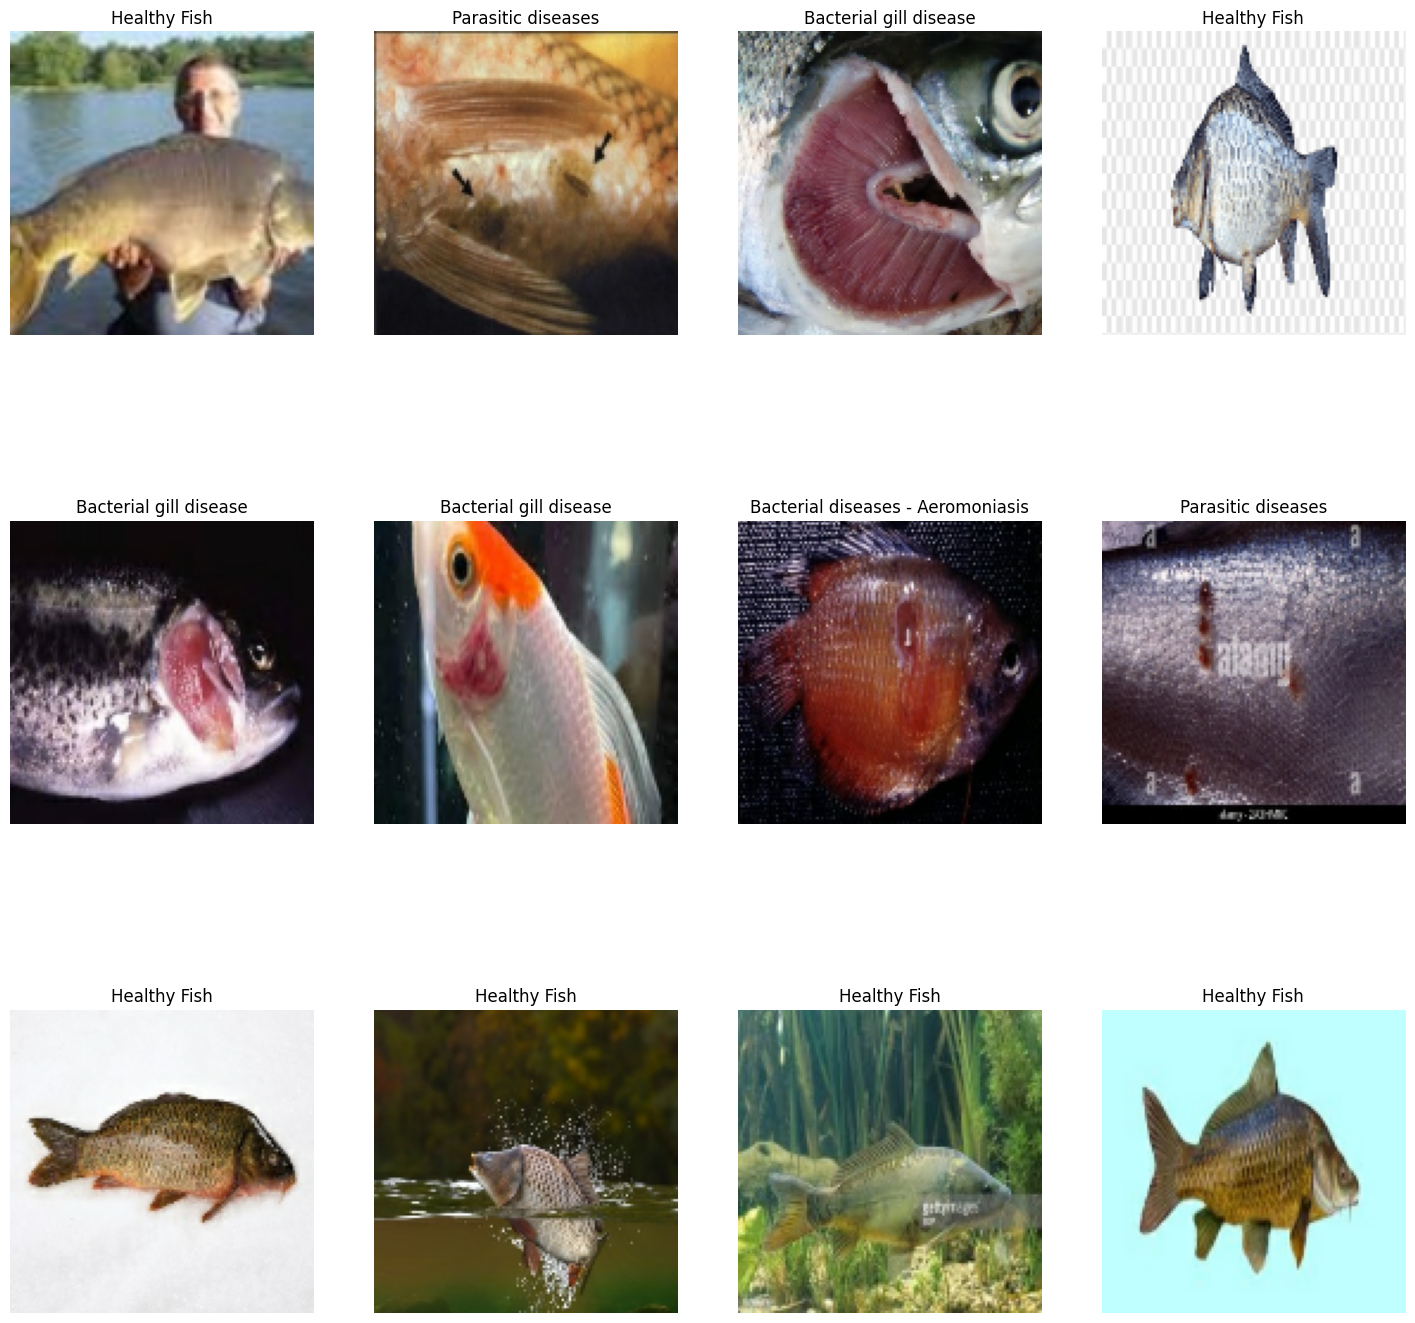

In [246]:

plt.figure(figsize=(18,18))
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())
  print(image_batch[0].shape)
  for i in range(12):
      ax = plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(classes[label_batch[i]])
      plt.axis("off")

In [247]:
import tensorflow as tf
CHANNELS = 3
input_shape = (IMAGE_SIZE, IMAGE_SIZE,CHANNELS)
def resize_with_bilinear_interpolation(image):
    image = tf.image.resize(image, (input_shape[0], input_shape[1]), method=tf.image.ResizeMethod.BILINEAR)
    return image

dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/SB-FishDisease/SB-FishDisease",
    shuffle=True,
    image_size=input_shape[:2],
    batch_size=BATCH_SIZE
)
dataset = dataset.map(lambda x, y: (resize_with_bilinear_interpolation(x), y))

Found 457 files belonging to 7 classes.


(64, 128, 128, 3)
[4 2 4 2 5 6 4 5 5 0 1 3 5 6 2 4 4 4 3 4 6 2 1 4 4 4 0 4 3 0 1 4 2 4 5 4 0
 3 4 4 4 2 3 6 6 1 4 6 4 4 4 3 0 3 1 0 4 1 6 6 6 3 4 4]
(128, 128, 3)


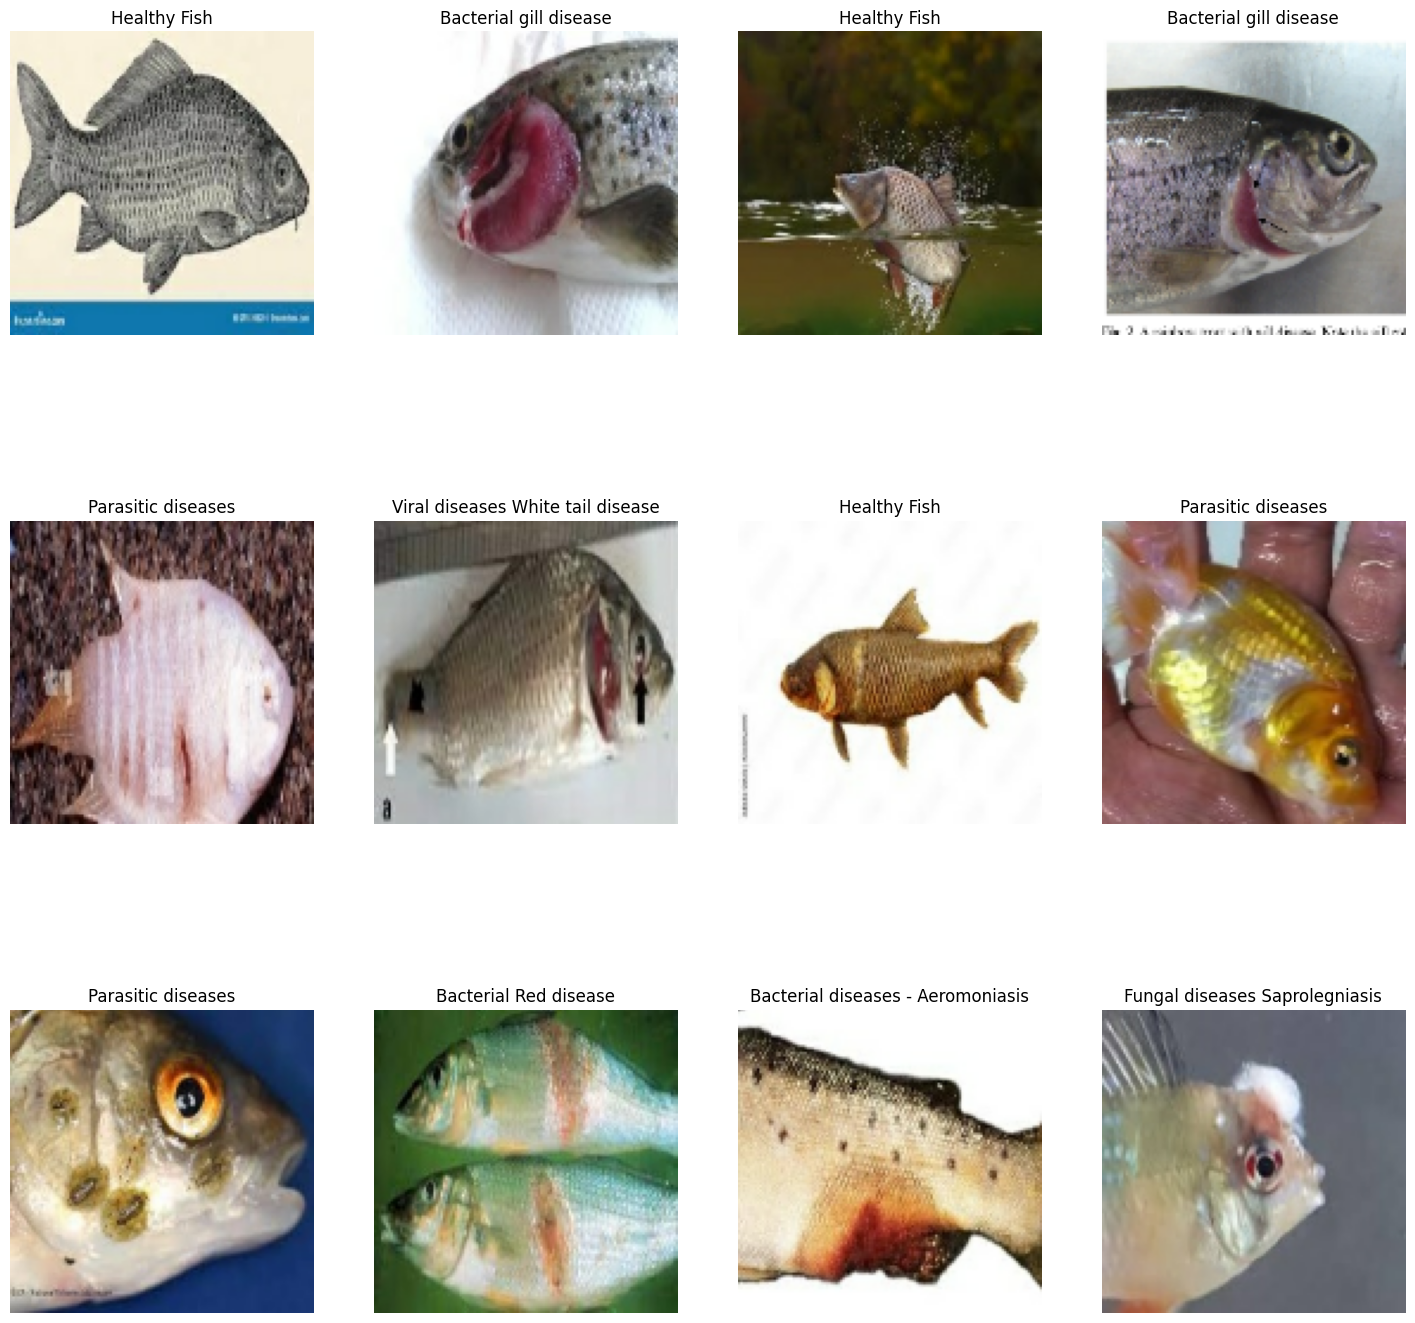

In [248]:
plt.figure(figsize=(18,18))
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())
  print(image_batch[0].shape)
  for i in range(12):
      ax = plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(classes[label_batch[i]])
      plt.axis("off")

In [249]:
import tensorflow as tf

IMAGE_SIZE = 128
BATCH_SIZE = 32
AUGMENTATION_FACTOR = 3

dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/SB-FishDisease/SB-FishDisease",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

augmented_dataset = dataset.flat_map(lambda x, y: tf.data.Dataset.from_tensors((data_augmentation(x), y)).repeat(AUGMENTATION_FACTOR))
augmented_dataset = augmented_dataset.shuffle(buffer_size=len(dataset) * AUGMENTATION_FACTOR)
augmented_dataset = augmented_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
print("Length of the augmented dataset:", len(list(augmented_dataset)))


Found 457 files belonging to 7 classes.
Length of the augmented dataset: 45


(32, 128, 128, 3)
[6 5 4 0 2 1 4 4 3 2 2 0 4 6 2 4 4 5 0 6 4 2 5 4 4 3 1 6 4 4 6 4]
(128, 128, 3)


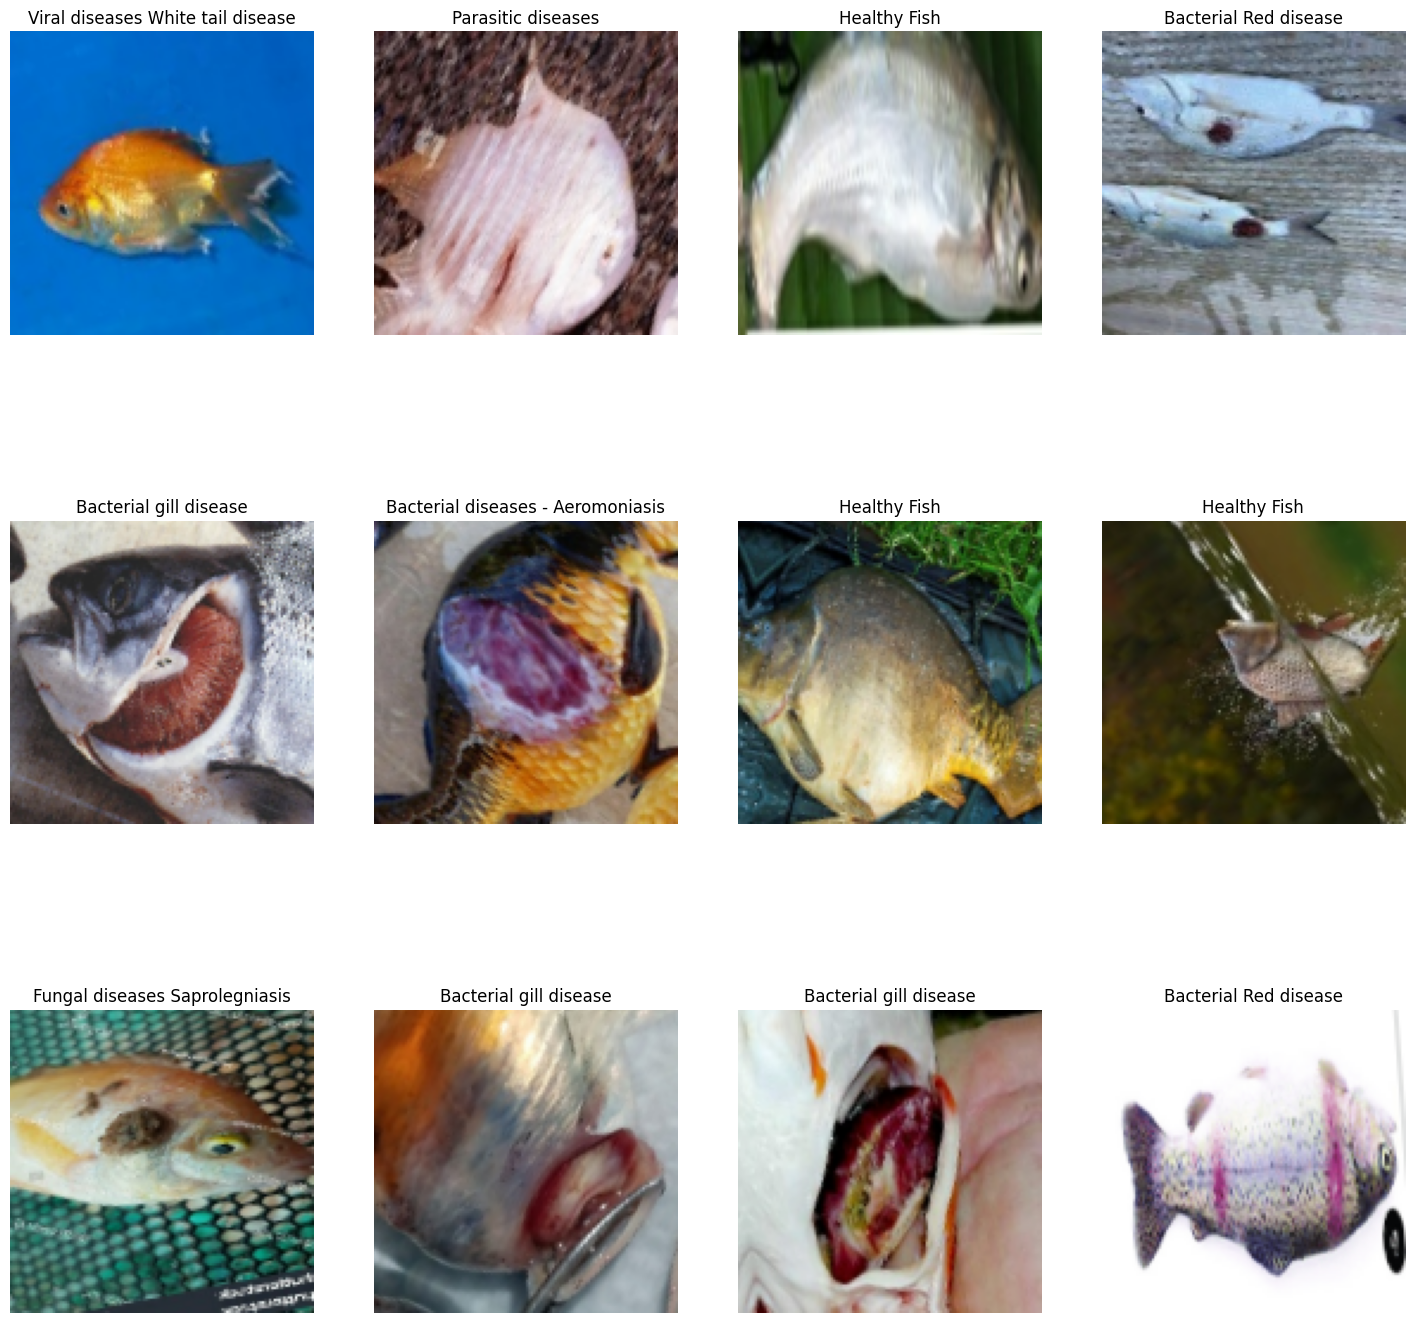

In [250]:
plt.figure(figsize=(18,18))
for image_batch, label_batch in augmented_dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())
  print(image_batch[0].shape)
  for i in range(12):
      ax = plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(classes[label_batch[i]])
      plt.axis("off")

In [251]:
import tensorflow as tf
BATCH_SIZE = 32
num_images = 0
for batch in augmented_dataset:
    num_images += batch[0].shape[0]

print("Number of images in the augmented dataset:", num_images)


Number of images in the augmented dataset: 1371


In [252]:
lr_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/SB-FishDisease/SB-FishDisease",
    shuffle=True,
    image_size=(32,32),
    batch_size=BATCH_SIZE,
)

hr_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/SB-FishDisease/SB-FishDisease",
    shuffle=True,
    image_size=(224,224),
    batch_size=BATCH_SIZE,
)

Found 457 files belonging to 7 classes.
Found 457 files belonging to 7 classes.


In [253]:
lr_images = []
hr_images = []

for image_batch, _ in lr_dataset.take(len(lr_dataset)):
  print(image_batch.shape)
  for i in range(image_batch.shape[0]):
    lr_images.append(image_batch[i])


for image_batch, _ in hr_dataset.take(len(hr_dataset)):
  print(image_batch.shape)
  for i in range(image_batch.shape[0]):
    hr_images.append(image_batch[i])
len(lr_images)

(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(9, 32, 32, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(9, 224, 224, 3)


457

In [254]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers, Model
from sklearn.model_selection import train_test_split

import numpy as np
from keras import Model
from keras.layers import Conv2D, PReLU,BatchNormalization, Flatten
from keras.layers import UpSampling2D, LeakyReLU, Dense, Input, add
from tqdm import tqdm

In [255]:
lr_images = np.array(lr_images)
hr_images = np.array(hr_images)

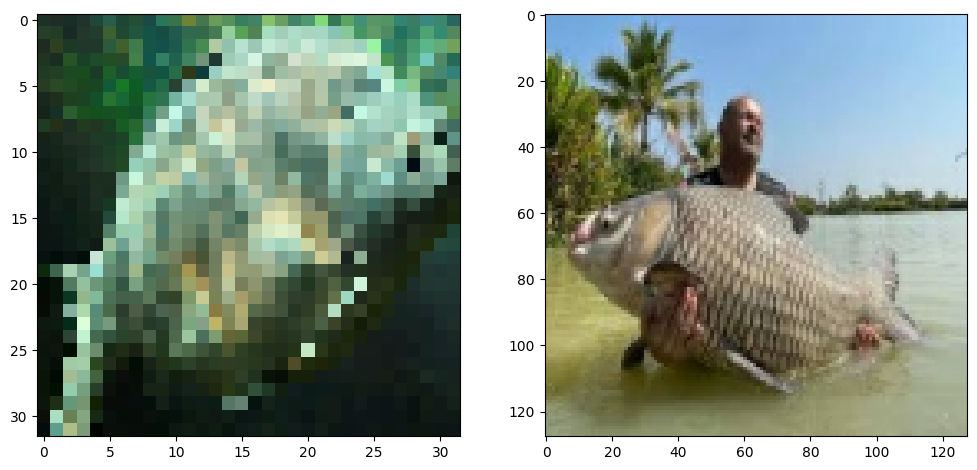

In [256]:
import random
import numpy as np
image_number = random.randint(0, len(lr_images)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
lr_images[image_number].shape
plt.imshow(np.reshape(lr_images[image_number].astype("uint8"), (32, 32, 3)))
plt.subplot(122)

resized_hr_image = cv2.resize(hr_images[image_number], (128, 128))

plt.imshow(np.reshape(resized_hr_image.astype("uint8"), (128, 128, 3)))
plt.show()

In [257]:
lr_images = np.array(lr_images)
hr_images = np.array(hr_images)
lr_images = lr_images / 255.
hr_images = hr_images / 255.

#Split to train and test
lr_train, lr_test, hr_train, hr_test = train_test_split(lr_images, hr_images,
                                                      test_size=0.33, random_state=42)

In [258]:
hr_shape = (hr_train.shape[1], hr_train.shape[2], hr_train.shape[3])
lr_shape = (lr_train.shape[1], lr_train.shape[2], lr_train.shape[3])

In [259]:
lr_ip = Input(shape=lr_shape)
hr_ip = Input(shape=hr_shape)
#new_input_shape = (128, 128, 3)
#lr_ip = Input(shape=new_input_shape)

In [260]:
train_size=0.7
val_size=0.1
len(list(augmented_dataset))*train_size

31.499999999999996

In [261]:
train_ds=augmented_dataset.take(int(len(list(augmented_dataset))*train_size))
len(list(train_ds))

31

In [262]:
secondary_ds = augmented_dataset.skip(int(len(list(augmented_dataset))*train_size))
len(list(secondary_ds))

14

In [263]:
import math
val_ds=secondary_ds.take(math.ceil(len(list(secondary_ds))*val_size))
len(list(val_ds))

2

In [264]:
test_ds=secondary_ds.skip(math.ceil(len(list(secondary_ds))*val_size))
len(list(test_ds))

12

In [265]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

IMAGE_SIZE = 128  # Assuming you have a specific image size
CHANNELS = 3
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
num_classes = 7

base_model = MobileNet(include_top=False, weights='imagenet', input_shape=input_shape, pooling='max')
model = models.Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(1024, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(rate=0.4, seed=75),
    Dense(1024, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(rate=0.2, seed=75),
    Dense(num_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [266]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functi  (None, 1024)              3228864   
 onal)                                                           
                                                                 
 batch_normalization_6 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dense_20 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_12 (Dropout)        (None, 1024)              0         
                                                                 
 dense_21 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_13 (Dropout)        (None, 1024)            

In [267]:
!pip install --upgrade visualkeras

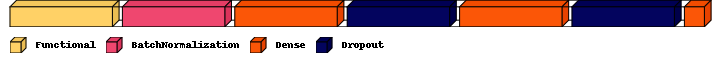

In [268]:
from tensorflow.keras import layers
from collections import defaultdict
import visualkeras

# Customize the colors
color_map = defaultdict(dict)
color_map[layers.Conv2D]["fill"] = "#00f5d4"
color_map[layers.MaxPooling2D]["fill"] = "#8338ec"
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'

def get_layer_shapes(layer):
    input_shape = layer.input_shape
    output_shape = layer.output_shape
    return [input_shape[1], input_shape[2], input_shape[3]], [output_shape[1], output_shape[2], output_shape[3]]

visualkeras.layered_view(model, legend=True, scale_xy=2.0, color_map=color_map, to_file='model.png')

In [269]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [270]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
31/31 [==============================] - 29s 192ms/step - loss: 29.6350 - accuracy: 0.6832 - val_loss: 23.5868 - val_accuracy: 0.5156
Epoch 2/50
31/31 [==============================] - 7s 124ms/step - loss: 14.4222 - accuracy: 0.8266 - val_loss: 10.9899 - val_accuracy: 0.5625
Epoch 3/50
31/31 [==============================] - 4s 85ms/step - loss: 6.5775 - accuracy: 0.8689 - val_loss: 5.8244 - val_accuracy: 0.4219
Epoch 4/50
31/31 [==============================] - 5s 129ms/step - loss: 3.4106 - accuracy: 0.8615 - val_loss: 3.9851 - val_accuracy: 0.4531
Epoch 5/50
31/31 [==============================] - 3s 79ms/step - loss: 2.1468 - accuracy: 0.8524 - val_loss: 2.3312 - val_accuracy: 0.6094
Epoch 6/50
31/31 [==============================] - 3s 78ms/step - loss: 1.4780 - accuracy: 0.8844 - val_loss: 1.8609 - val_accuracy: 0.6098
Epoch 7/50
31/31 [==============================] - 5s 128ms/step - loss: 1.1792 - accuracy: 0.8916 - val_loss: 1.2700 - val_accuracy: 0.8125
Epoc

In [271]:
scores = model.evaluate(test_ds)

12/12 [==============================] - 1s 25ms/step - loss: 0.6339 - accuracy: 0.9036


In [272]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': None}

In [273]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [274]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

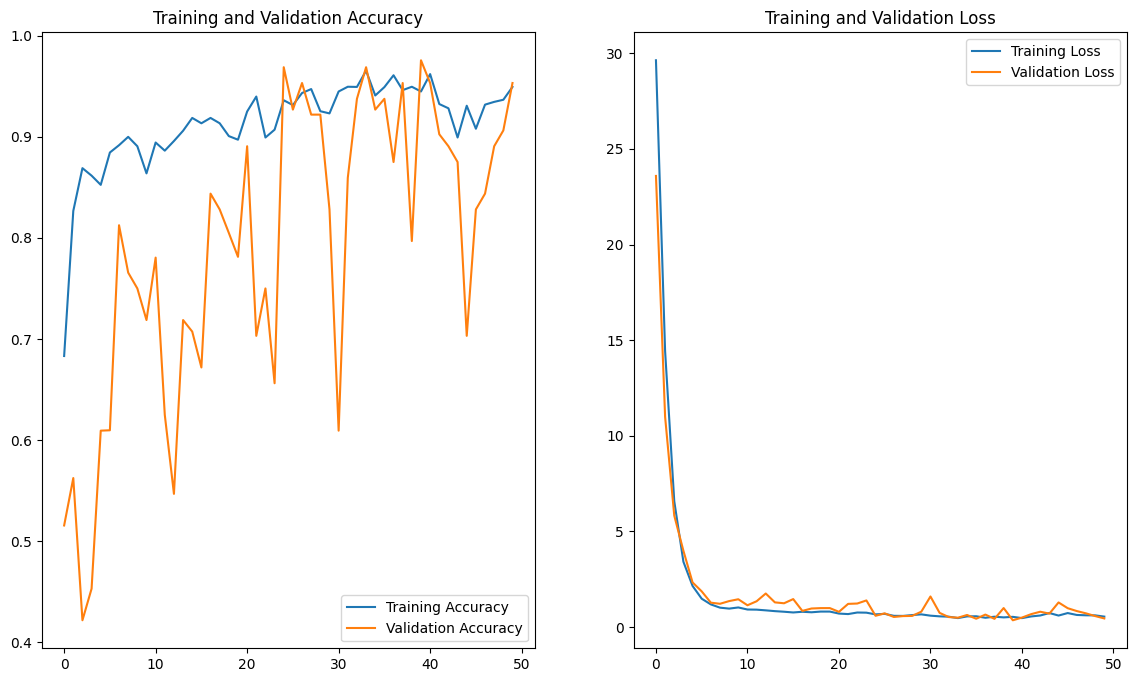

In [275]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

First image to predict
Actual label:  Viral diseases White tail disease
1/1 [==============================] - 1s 710ms/step
Predicted label: Viral diseases White tail disease


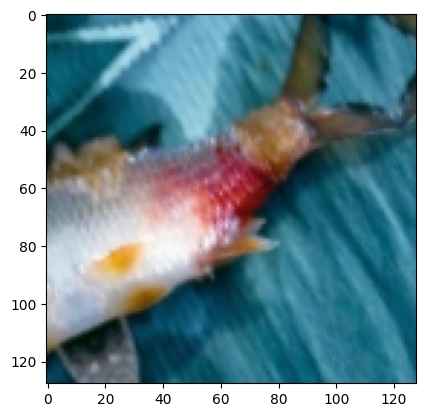

In [276]:
for image_batch, label_batch in test_ds.take(1):
  first_image = image_batch[0].numpy().astype('uint8')
  first_label = label_batch[0].numpy()

  print("First image to predict")
  plt.imshow(first_image)
  print("Actual label: ", classes[first_label])

  batch_predict = model.predict(image_batch)
  print("Predicted label:", classes[np.argmax(batch_predict[0])])

In [277]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)

  predicted_class = classes[np.argmax(predictions[0])]
  probabilities = tf.nn.softmax(predictions)
  confidence = 100 * probabilities[0, np.argmax(predictions)]

  return predicted_class,confidence

1/1 [==============================] - 0s 72ms/step


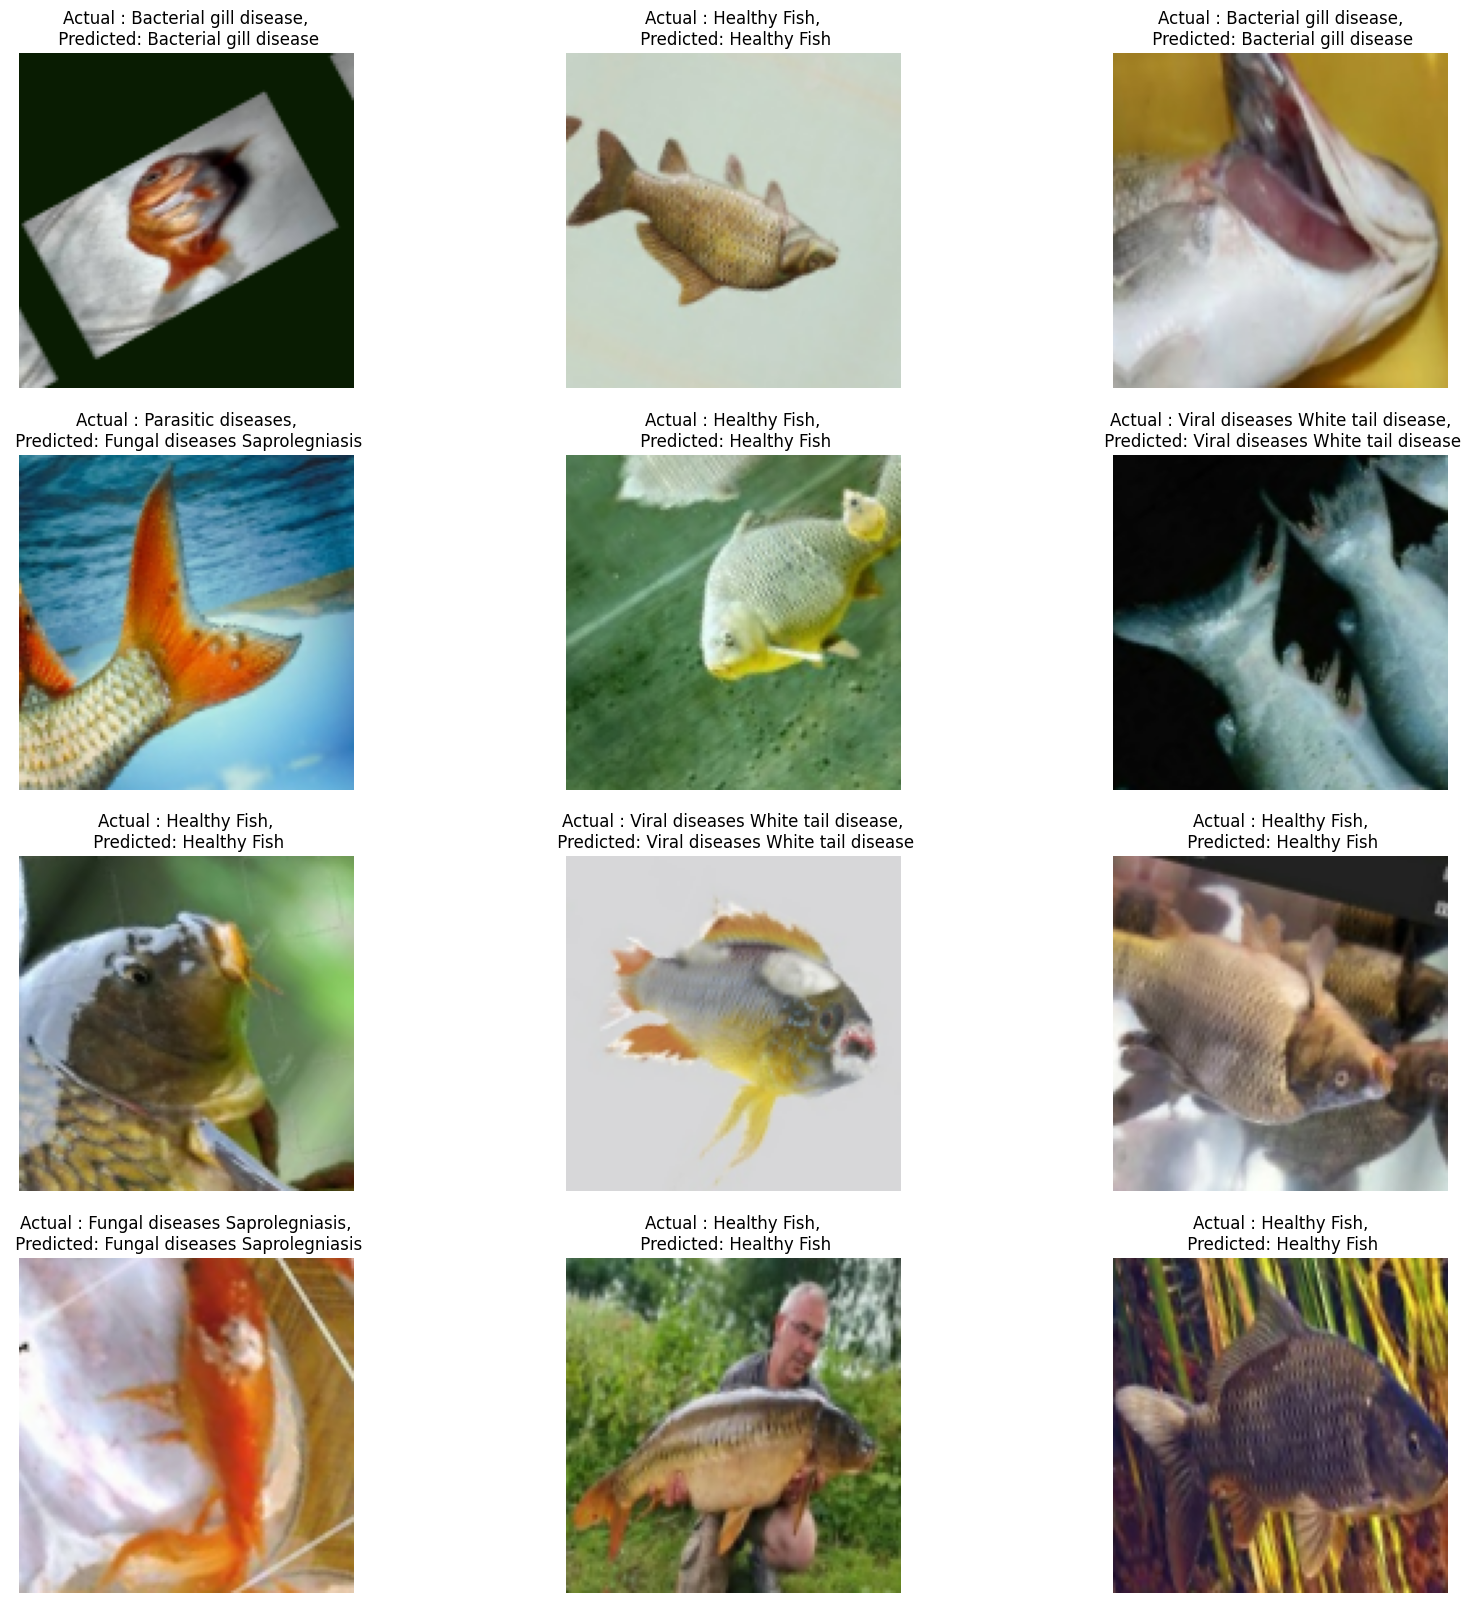

In [278]:
plt.figure(figsize=(20,20))

for images, labels in test_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4,3, i+1)
    predicted_class, _ = predict(model, images[i].numpy())
    actual_class = classes[labels[i]]

    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(f"Actual : {actual_class},\n Predicted: {predicted_class}")
    plt.axis("off")

In [279]:
model_version=1
model.save(f"../models/{model_version}")

In [280]:
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

In [281]:
def classification_report_gen(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)
  predictions = model.predict(img_array)
  predicted_class = classes[np.argmax(predictions)]
  return predicted_class, predictions

1/1 [==============================] - 0s 38ms/step
                                   precision    recall  f1-score   support

            Bacterial Red disease       0.80      0.98      0.88        48
Bacterial diseases - Aeromoniasis       1.00      0.68      0.81        38
           Bacterial gill disease       0.98      0.86      0.91        50
   Fungal diseases Saprolegniasis       0.80      0.89      0.84        27
                     Healthy Fish       0.99      0.94      0.96       140
               Parasitic diseases       0.69      0.96      0.80        25
Viral diseases White tail disease       0.86      0.91      0.88        33

                         accuracy                           0.90       361
                        macro avg       0.87      0.89      0.87       361
                     weighted avg       0.92      0.90      0.90       361



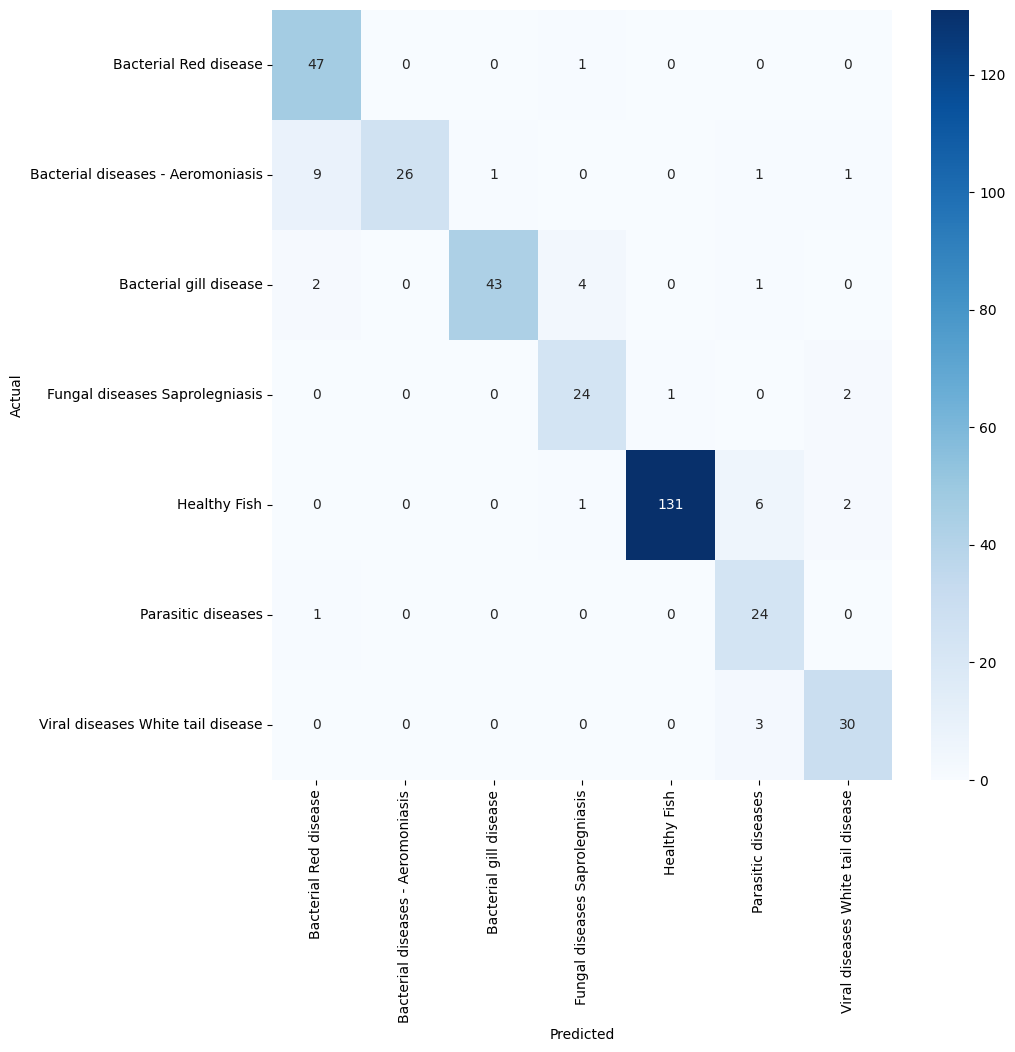

In [282]:
import matplotlib.pyplot as plt
import seaborn as sn

y_pred = []
y_true = []

for images, labels in test_ds:
  for image, label in zip(images, labels):
    image = image.numpy()
    predicted_class, _ = classification_report_gen(model, image)
    y_pred.append(predicted_class)
    y_true.append(classes[label])

print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 10))
sn.heatmap(cm,cmap='Blues', annot=True, fmt="d", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [283]:
accuracy = np.trace(cm) / float(np.sum(cm))
print("Accuracy:", accuracy)

Accuracy: 0.9002770083102493
